In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.backend import clear_session
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow import math

from sklearn.metrics import roc_curve
from utils import load_dataset
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.config import list_physical_devices

assert len(list_physical_devices('GPU'))

In [3]:
def schedule(epoch, lr) -> float:
    if epoch >= 200 and epoch % 25 == 0:
        lr = lr * math.exp(-0.1)
#         print(f'Epoch {epoch}\tNew LR: {lr}')
    return lr

In [4]:
def train(dataset, model, epochs, verbose=0, validation_freq=1, callbacks=[]) -> Sequential:
    X_train, y_train, X_test, y_test = dataset
    clear_session()
    model = model
    model.compile(optimizer=optimizer, loss='mse')

    history = model.fit(X_train,
                        y_train,
                        epochs=epochs,
                        callbacks=callbacks,
                        validation_data=(X_test, y_test),
                        validation_freq=validation_freq,
                        verbose=verbose
    )

    passed_epochs = len(history.history['loss'])
    plt.plot(range(passed_epochs), history.history['loss'], label='loss')
    plt.plot(range(validation_freq, passed_epochs + 1, validation_freq),
             history.history['val_loss'],
             label='val loss'
    )
    plt.legend()
    plt.show()

    return model

In [5]:
def plot_roc(y, pred, boundary: int):
    y = np.where(y > boundary, 0, 1)
    pred = np.where(pred > boundary, 0, 1)

    fpr, tpr, thresholds = roc_curve(y, pred)

    plt.title(f'ROC curve with boundary {boundary}')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.plot(tpr, fpr)
    plt.show()
    print(f'Thresholds: {thresholds}')

In [6]:
scheduler = LearningRateScheduler(schedule)
es = EarlyStopping(monitor='loss', patience=25)
optimizer = Adam(lr=1e-3)

epochs = 500
validation_freq = 5

In [7]:
models_to_train = [
    Sequential([
        LSTM(4, input_shape=(4, 1000)),
        Dense(8, activation='relu'),
        Dense(1, activation='relu')
    ]),
    Sequential([
        LSTM(8, input_shape=(4, 1000)),
        Dense(8, activation='relu'),
        Dense(1, activation='relu')
    ]),
    Sequential([
        LSTM(16, input_shape=(4, 1000)),
        Dense(8, activation='relu'),
        Dense(1, activation='relu')
    ]),
    Sequential([
        LSTM(4, input_shape=(4, 1000)),
        Dense(32, activation='relu'),
        Dense(1, activation='relu')
    ]),
    Sequential([
        LSTM(8, input_shape=(4, 1000)),
        Dense(32, activation='relu'),
        Dense(1, activation='relu')
    ])
]

--------------- Starting model 0 on noise 0 ---------------


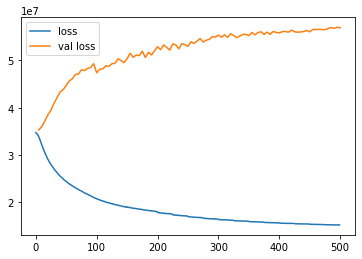

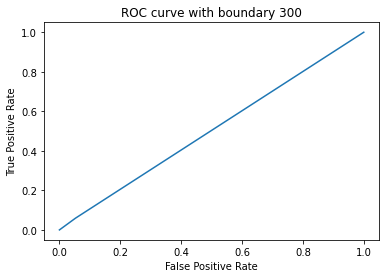

Thresholds: [2 1 0]


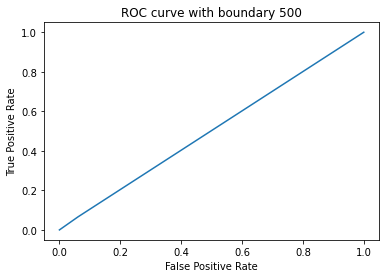

Thresholds: [2 1 0]


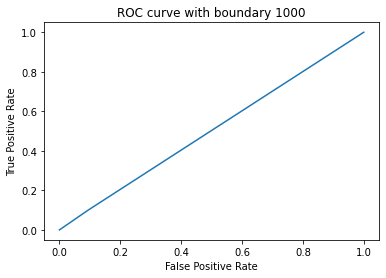

Thresholds: [2 1 0]


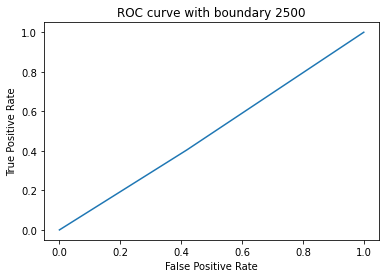

Thresholds: [2 1 0]


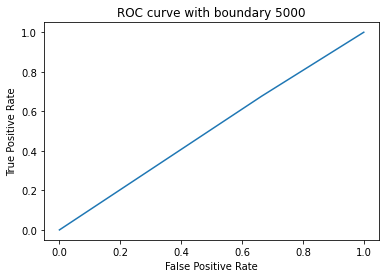

Thresholds: [2 1 0]
--------------- Starting model 0 on noise 1 ---------------


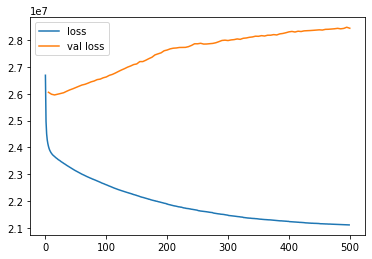

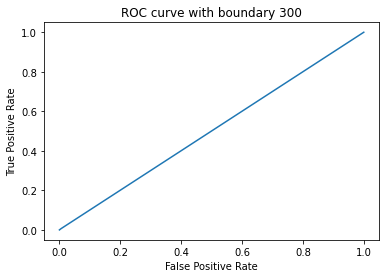

Thresholds: [2 1 0]


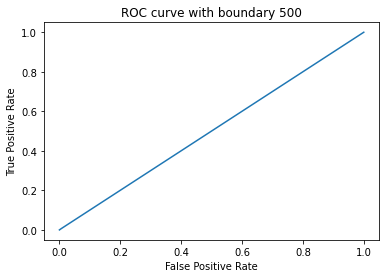

Thresholds: [2 1 0]


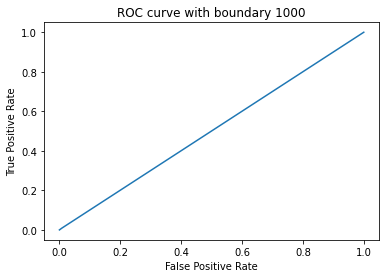

Thresholds: [2 1 0]


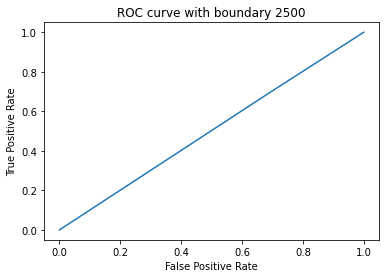

Thresholds: [2 1 0]


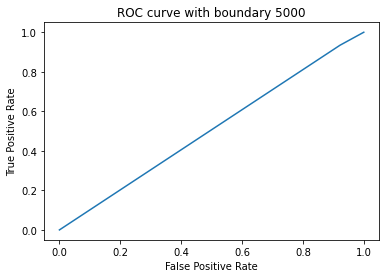

Thresholds: [2 1 0]
--------------- Starting model 0 on noise 2 ---------------


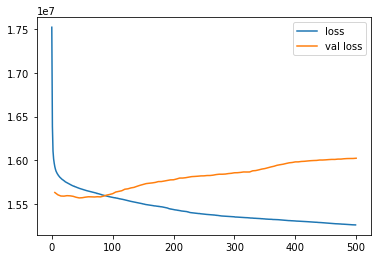

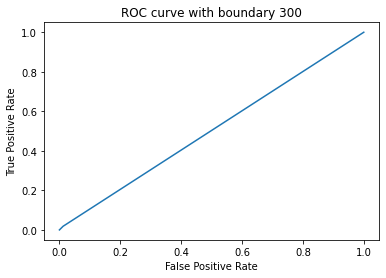

Thresholds: [2 1 0]


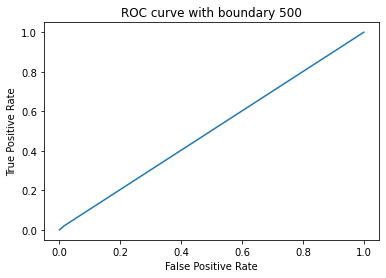

Thresholds: [2 1 0]


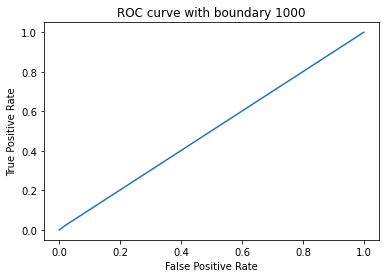

Thresholds: [2 1 0]


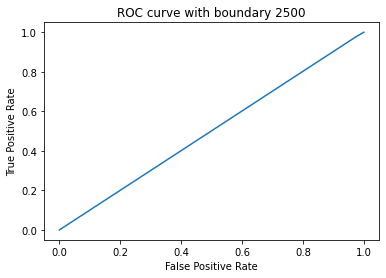

Thresholds: [2 1 0]


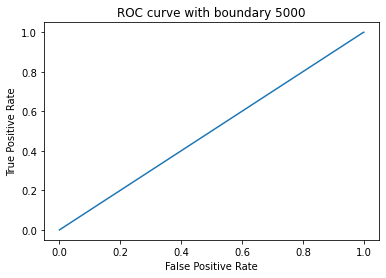

Thresholds: [2 1 0]
--------------- Starting model 0 on noise 3 ---------------


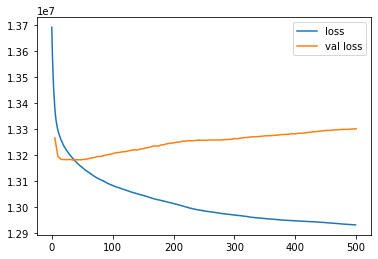

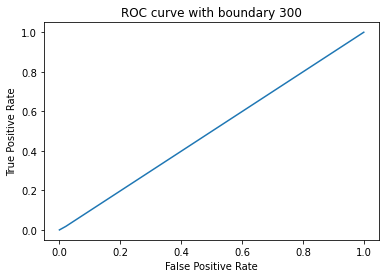

Thresholds: [2 1 0]


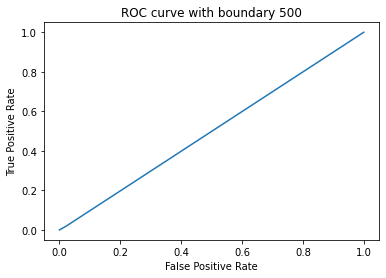

Thresholds: [2 1 0]


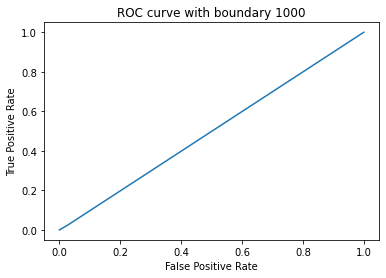

Thresholds: [2 1 0]


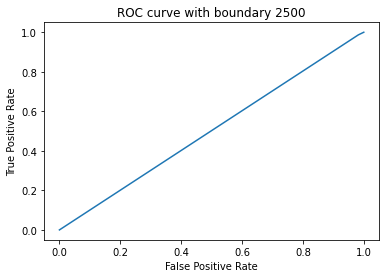

Thresholds: [2 1 0]


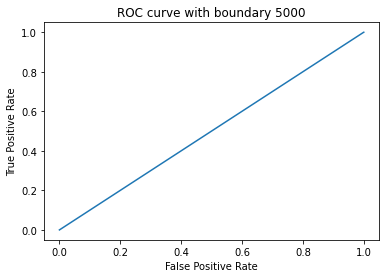

Thresholds: [2 1 0]
--------------- Starting model 0 on noise 5 ---------------


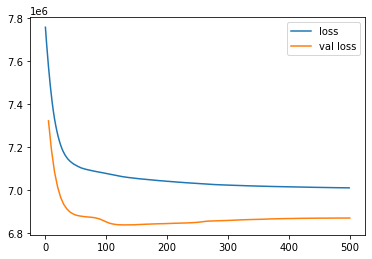

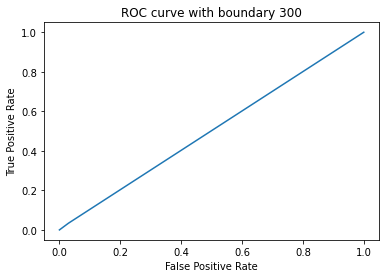

Thresholds: [2 1 0]


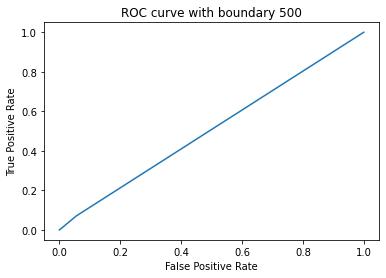

Thresholds: [2 1 0]


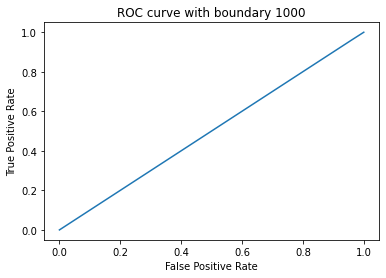

Thresholds: [2 1 0]


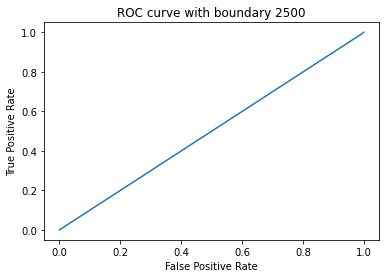

Thresholds: [2 1 0]


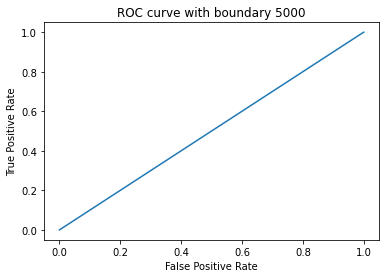

Thresholds: [2 1 0]
--------------- Starting model 0 on noise 8 ---------------


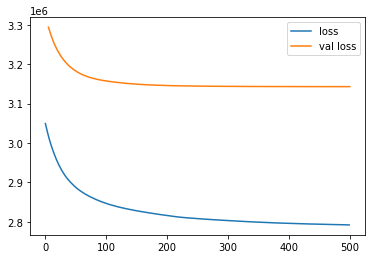

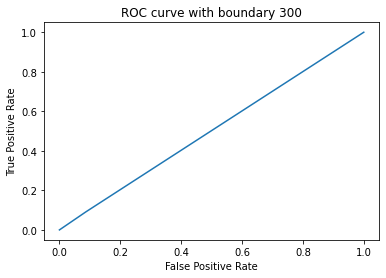

Thresholds: [2 1 0]


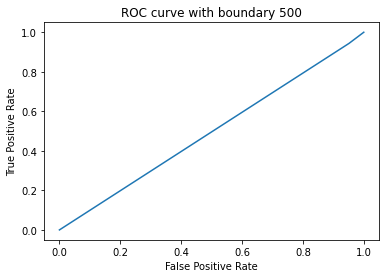

Thresholds: [2 1 0]


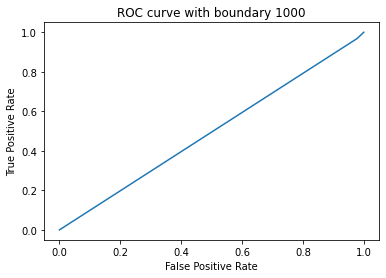

Thresholds: [2 1 0]


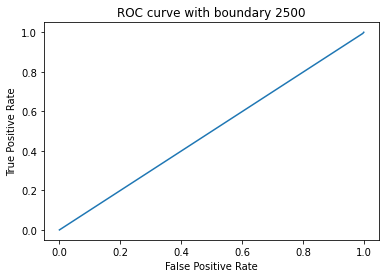

Thresholds: [2 1 0]


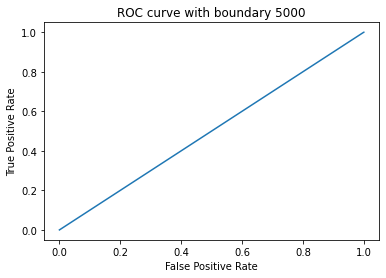

Thresholds: [2 1 0]
--------------- Starting model 1 on noise 0 ---------------


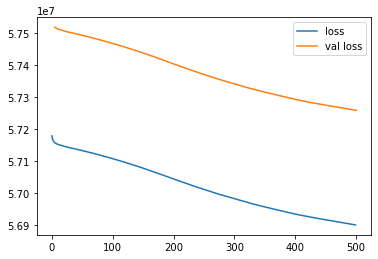

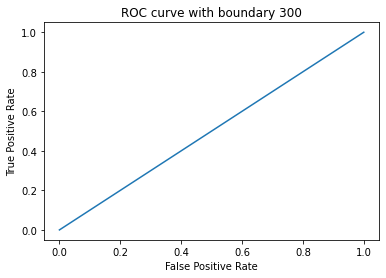

Thresholds: [2 1]


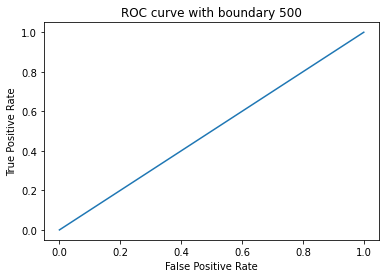

Thresholds: [2 1]


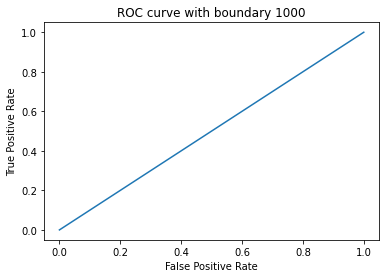

Thresholds: [2 1]


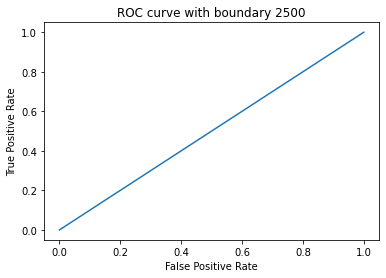

Thresholds: [2 1]


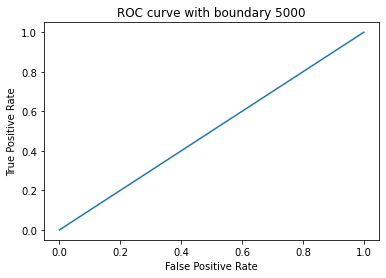

Thresholds: [2 1]
--------------- Starting model 1 on noise 1 ---------------


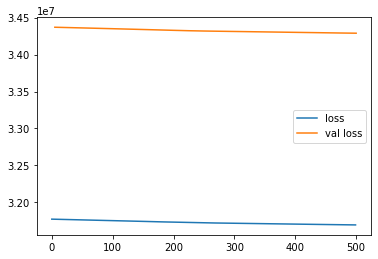

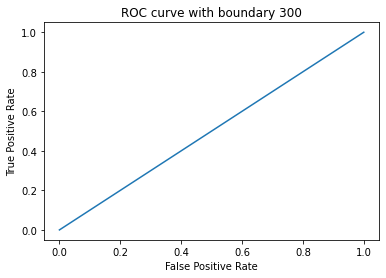

Thresholds: [2 1]


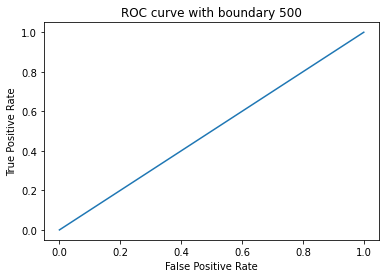

Thresholds: [2 1]


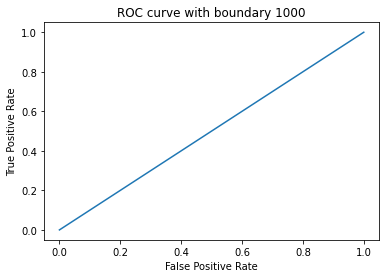

Thresholds: [2 1]


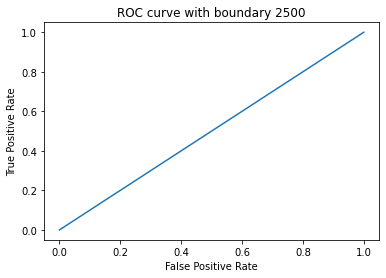

Thresholds: [2 1]


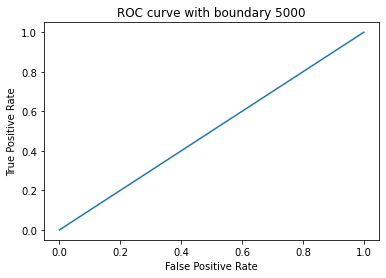

Thresholds: [2 1]
--------------- Starting model 1 on noise 2 ---------------


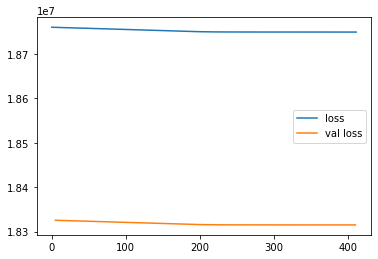

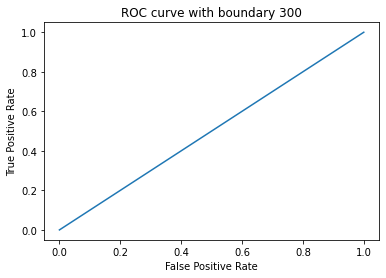

Thresholds: [2 1]


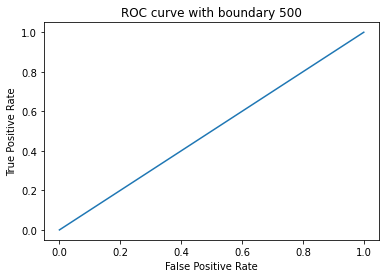

Thresholds: [2 1]


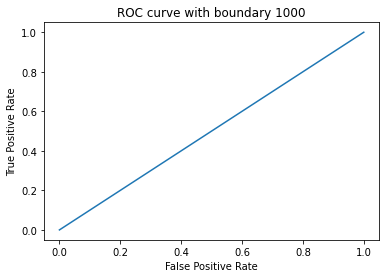

Thresholds: [2 1]


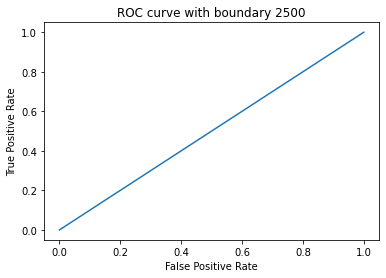

Thresholds: [2 1]


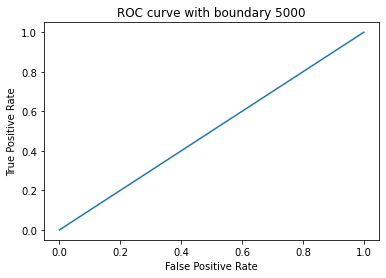

Thresholds: [2 1]
--------------- Starting model 1 on noise 3 ---------------


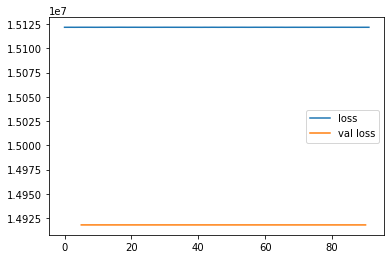

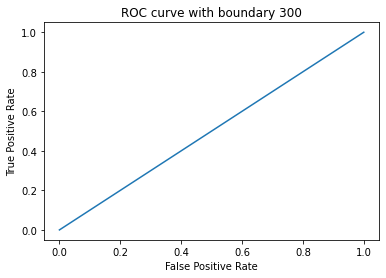

Thresholds: [2 1]


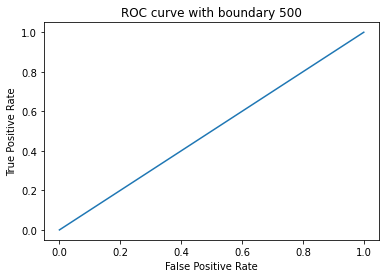

Thresholds: [2 1]


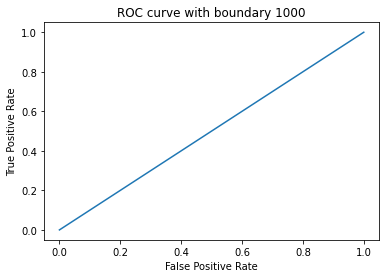

Thresholds: [2 1]


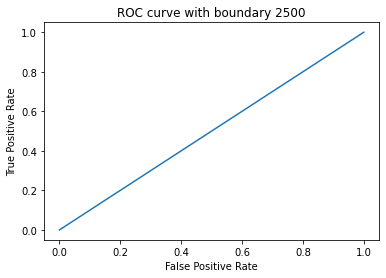

Thresholds: [2 1]


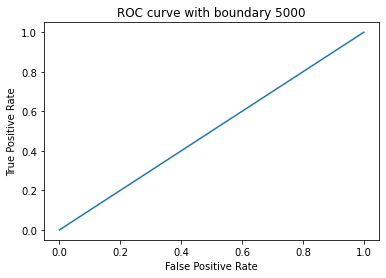

Thresholds: [2 1]
--------------- Starting model 1 on noise 5 ---------------


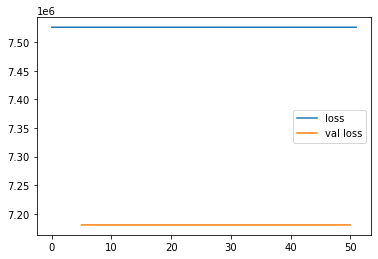

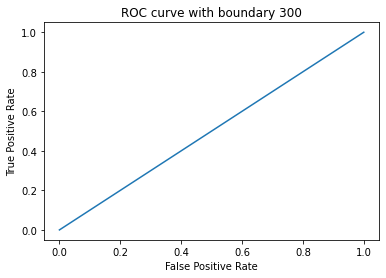

Thresholds: [2 1]


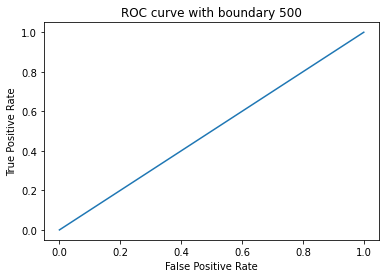

Thresholds: [2 1]


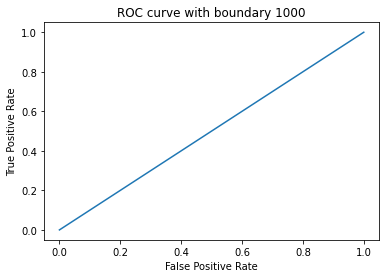

Thresholds: [2 1]


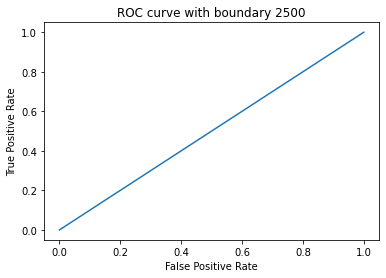

Thresholds: [2 1]


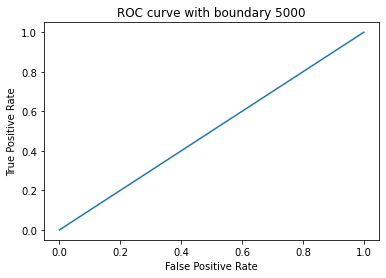

Thresholds: [2 1]
--------------- Starting model 1 on noise 8 ---------------


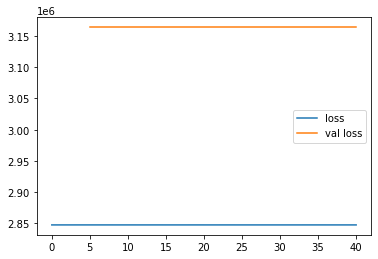

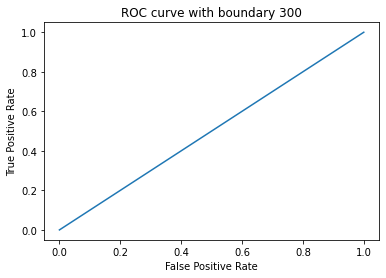

Thresholds: [2 1]


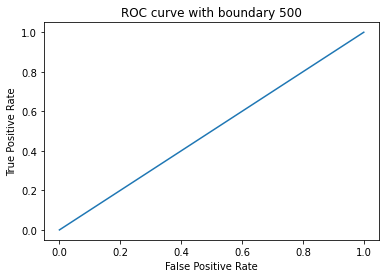

Thresholds: [2 1]


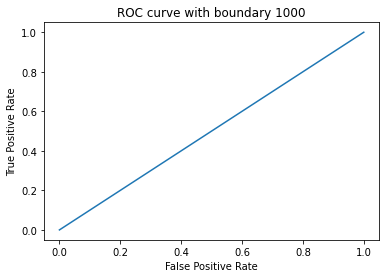

Thresholds: [2 1]


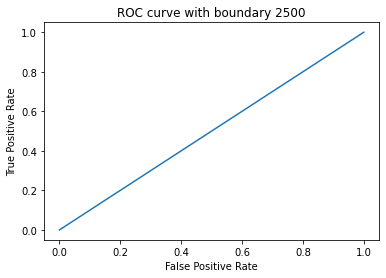

Thresholds: [2 1]


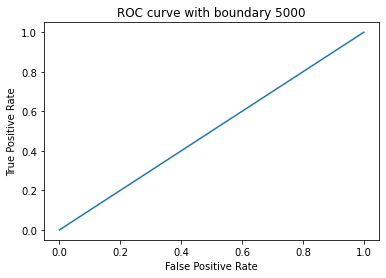

Thresholds: [2 1]
--------------- Starting model 2 on noise 0 ---------------


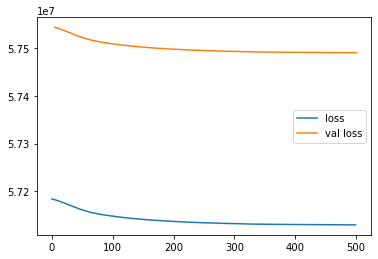

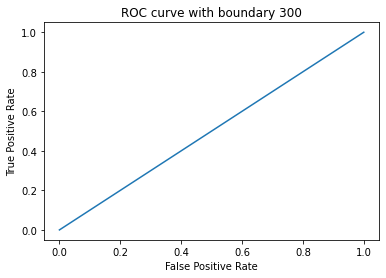

Thresholds: [2 1]


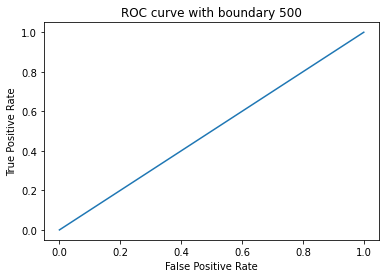

Thresholds: [2 1]


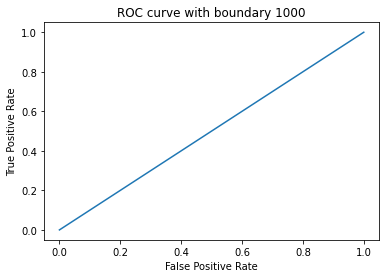

Thresholds: [2 1]


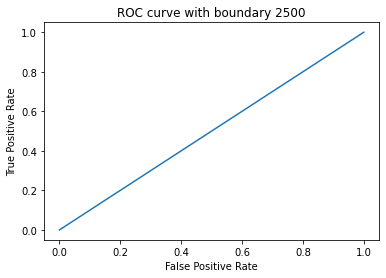

Thresholds: [2 1]


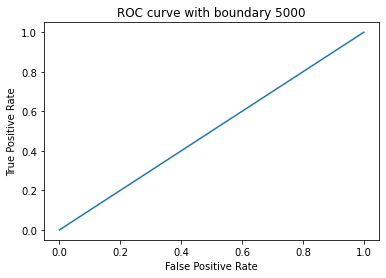

Thresholds: [2 1]
--------------- Starting model 2 on noise 1 ---------------


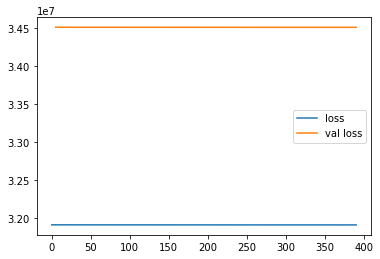

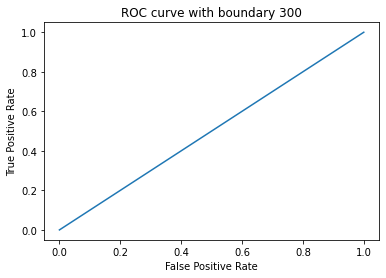

Thresholds: [2 1]


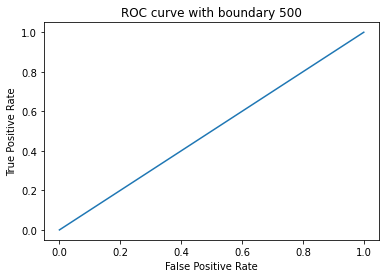

Thresholds: [2 1]


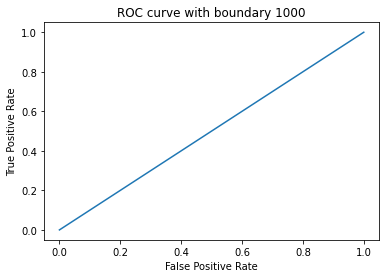

Thresholds: [2 1]


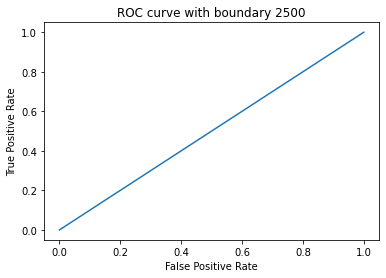

Thresholds: [2 1]


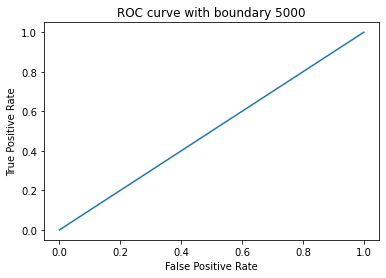

Thresholds: [2 1]
--------------- Starting model 2 on noise 2 ---------------


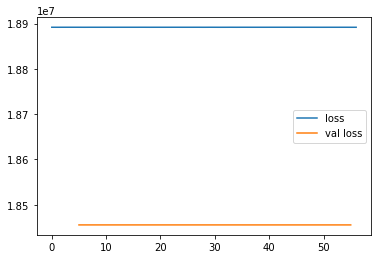

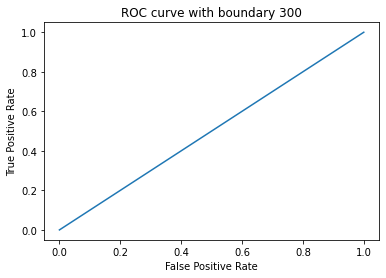

Thresholds: [2 1]


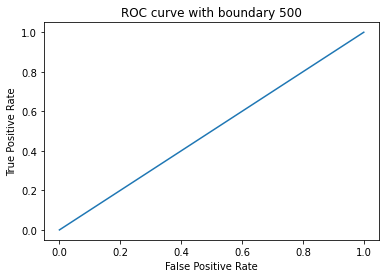

Thresholds: [2 1]


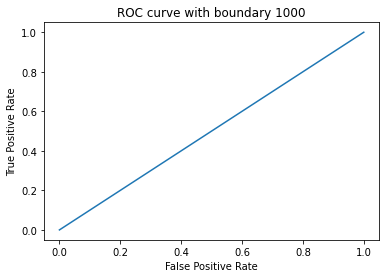

Thresholds: [2 1]


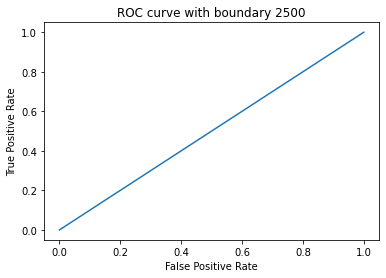

Thresholds: [2 1]


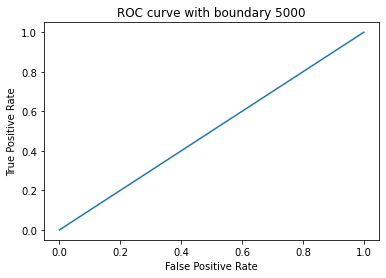

Thresholds: [2 1]
--------------- Starting model 2 on noise 3 ---------------


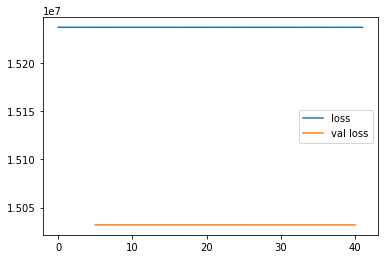

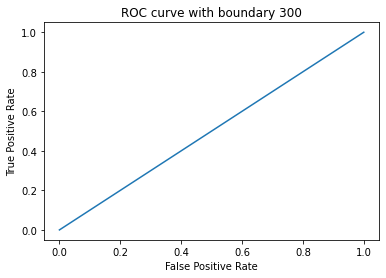

Thresholds: [2 1]


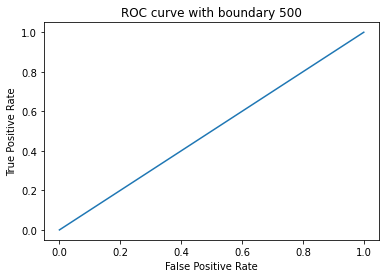

Thresholds: [2 1]


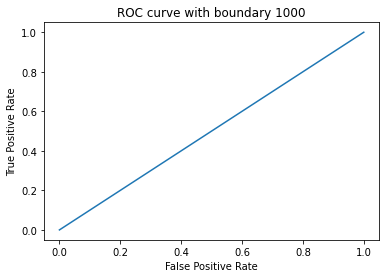

Thresholds: [2 1]


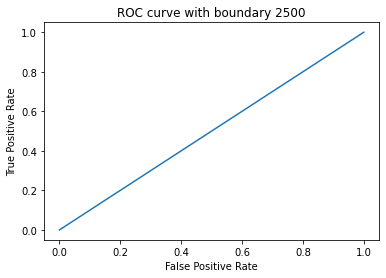

Thresholds: [2 1]


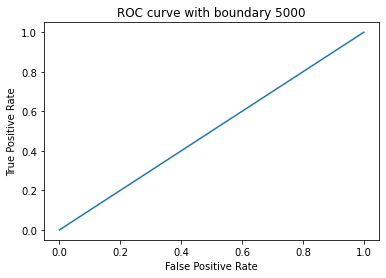

Thresholds: [2 1]
--------------- Starting model 2 on noise 5 ---------------


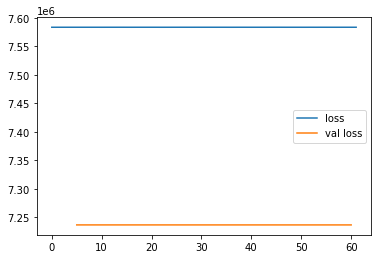

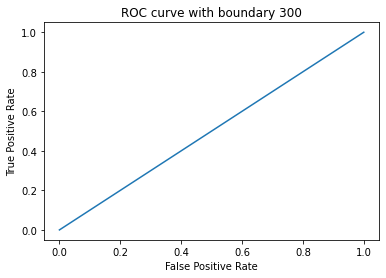

Thresholds: [2 1]


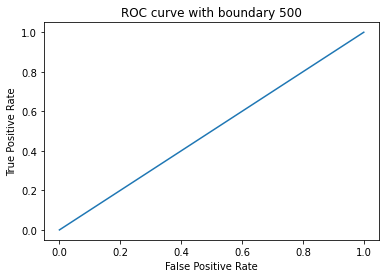

Thresholds: [2 1]


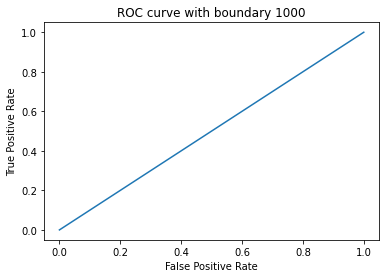

Thresholds: [2 1]


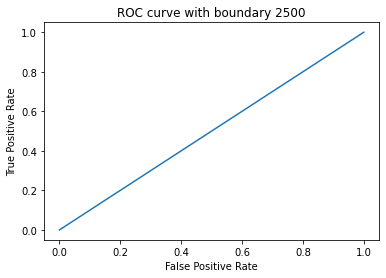

Thresholds: [2 1]


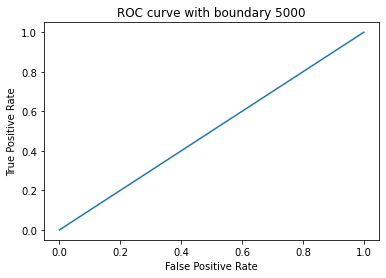

Thresholds: [2 1]
--------------- Starting model 2 on noise 8 ---------------


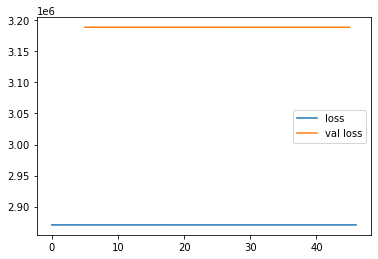

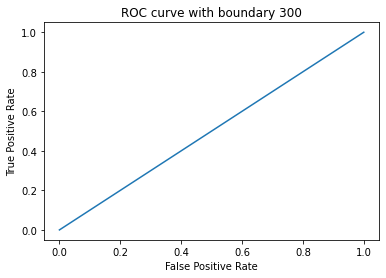

Thresholds: [2 1]


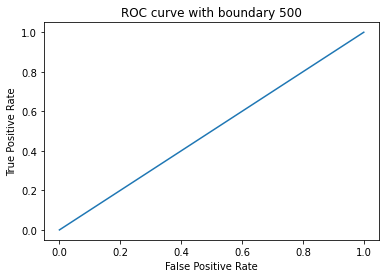

Thresholds: [2 1]


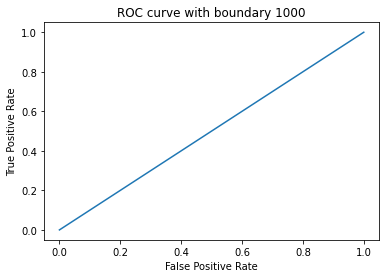

Thresholds: [2 1]


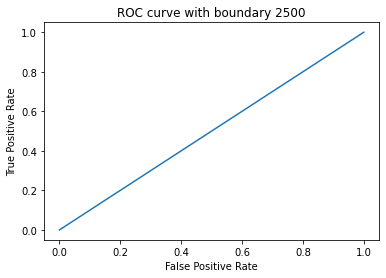

Thresholds: [2 1]


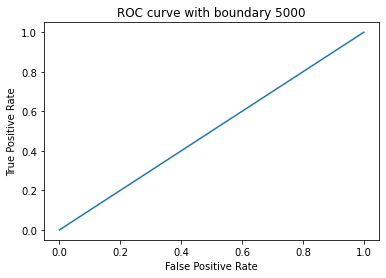

Thresholds: [2 1]
--------------- Starting model 3 on noise 0 ---------------


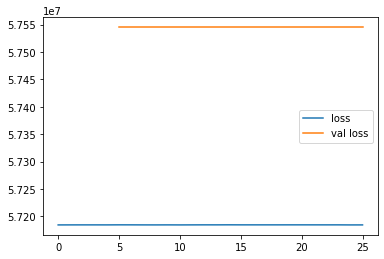

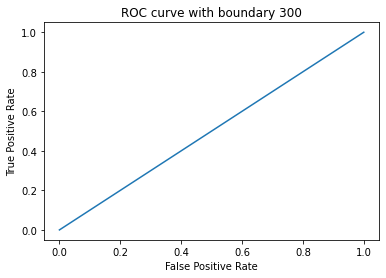

Thresholds: [2 1]


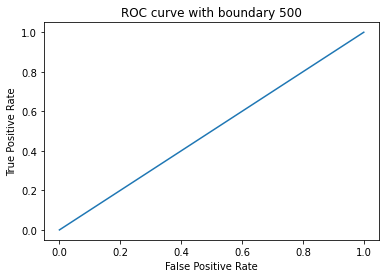

Thresholds: [2 1]


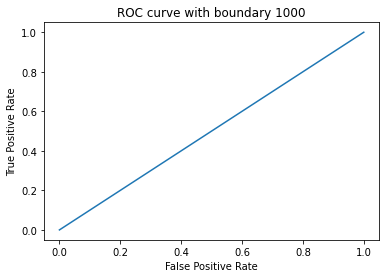

Thresholds: [2 1]


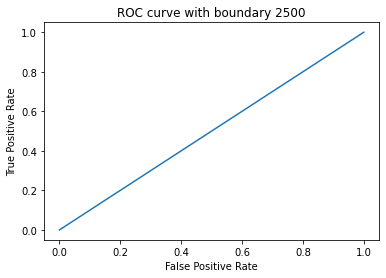

Thresholds: [2 1]


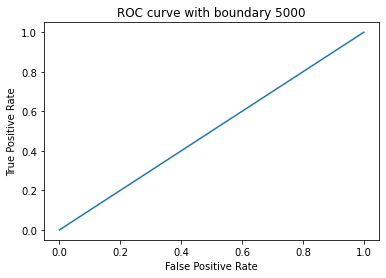

Thresholds: [2 1]
--------------- Starting model 3 on noise 1 ---------------


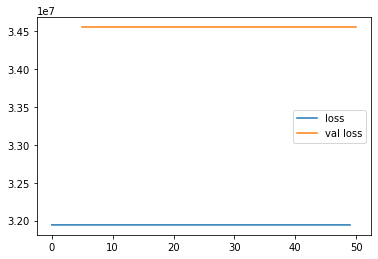

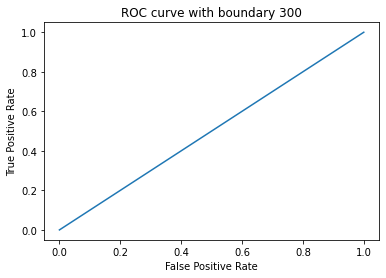

Thresholds: [2 1]


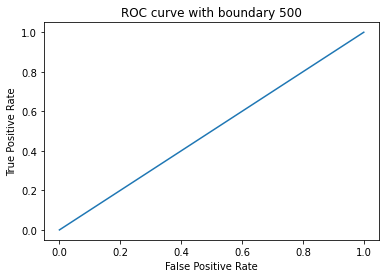

Thresholds: [2 1]


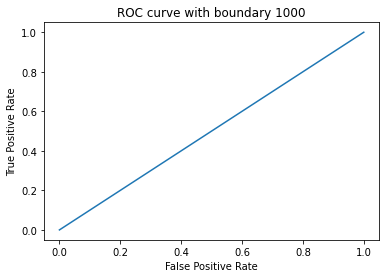

Thresholds: [2 1]


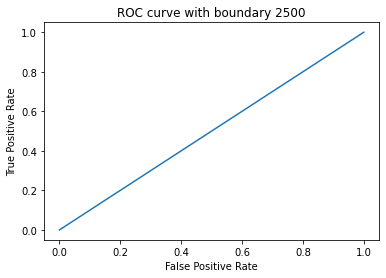

Thresholds: [2 1]


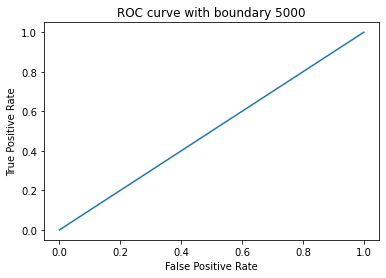

Thresholds: [2 1]
--------------- Starting model 3 on noise 2 ---------------


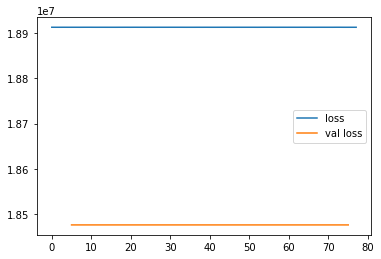

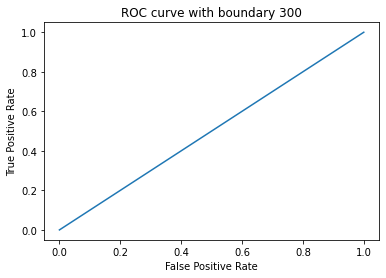

Thresholds: [2 1]


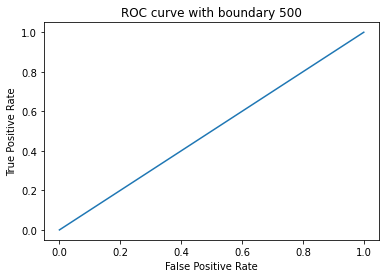

Thresholds: [2 1]


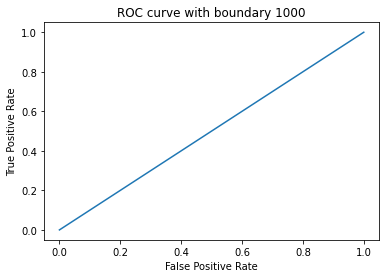

Thresholds: [2 1]


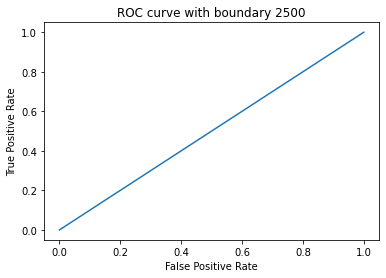

Thresholds: [2 1]


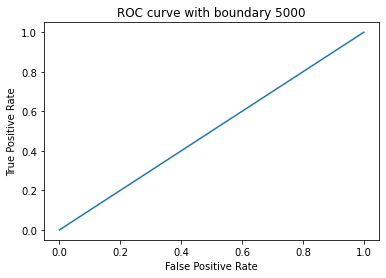

Thresholds: [2 1]
--------------- Starting model 3 on noise 3 ---------------


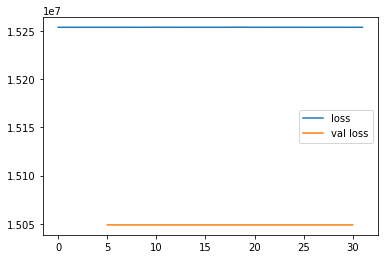

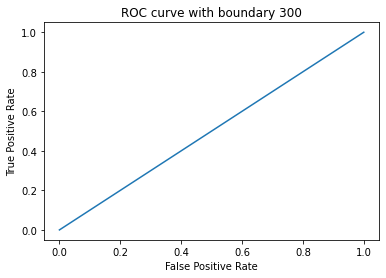

Thresholds: [2 1]


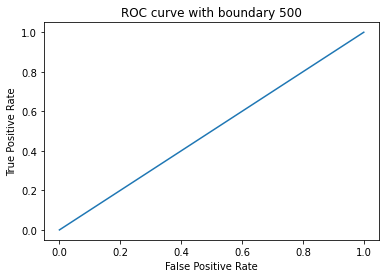

Thresholds: [2 1]


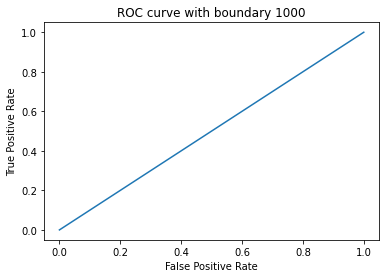

Thresholds: [2 1]


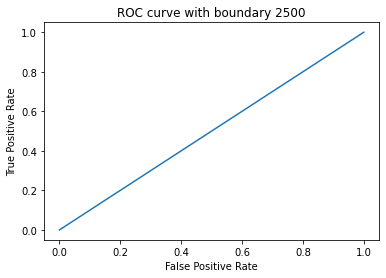

Thresholds: [2 1]


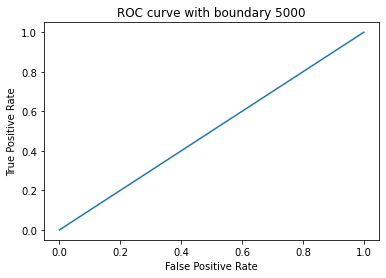

Thresholds: [2 1]
--------------- Starting model 3 on noise 5 ---------------


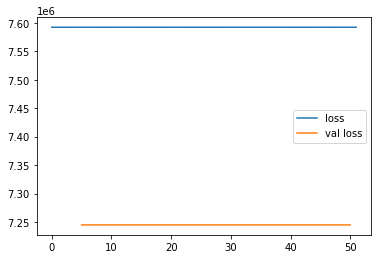

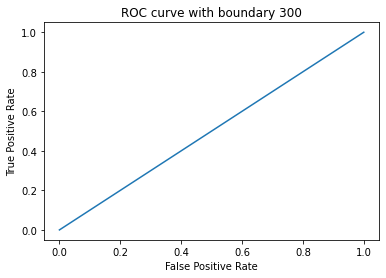

Thresholds: [2 1]


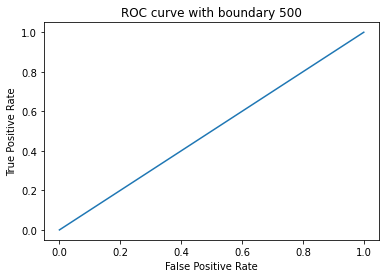

Thresholds: [2 1]


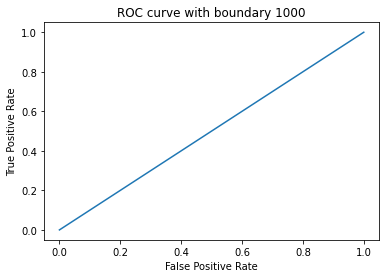

Thresholds: [2 1]


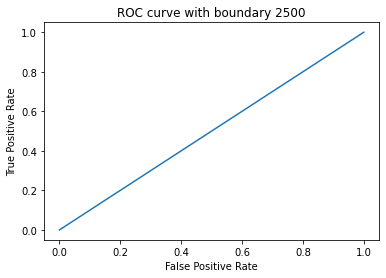

Thresholds: [2 1]


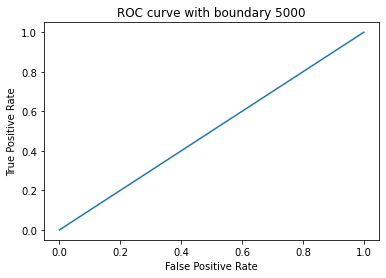

Thresholds: [2 1]
--------------- Starting model 3 on noise 8 ---------------


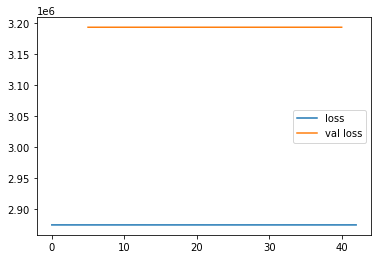

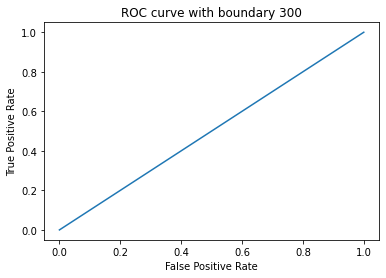

Thresholds: [2 1]


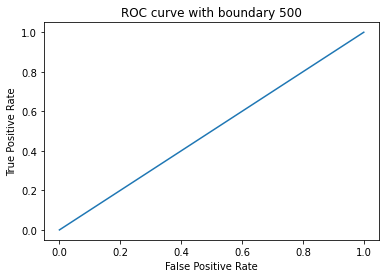

Thresholds: [2 1]


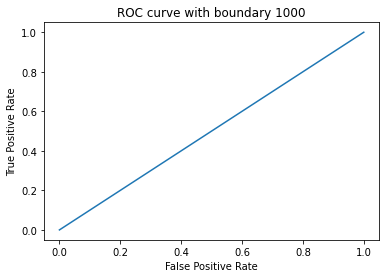

Thresholds: [2 1]


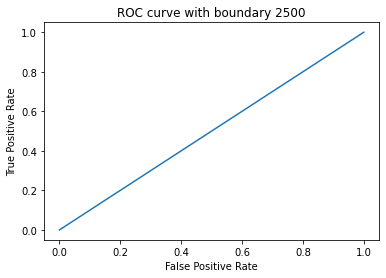

Thresholds: [2 1]


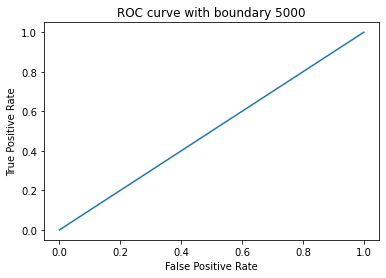

Thresholds: [2 1]
--------------- Starting model 4 on noise 0 ---------------


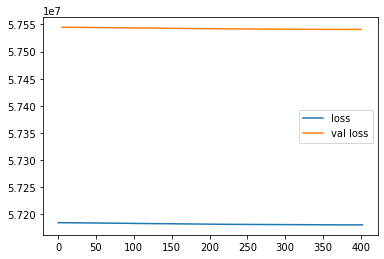

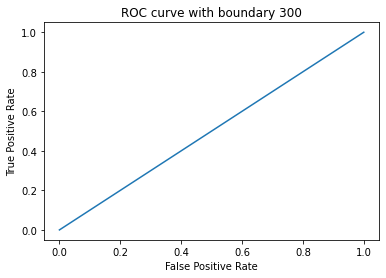

Thresholds: [2 1]


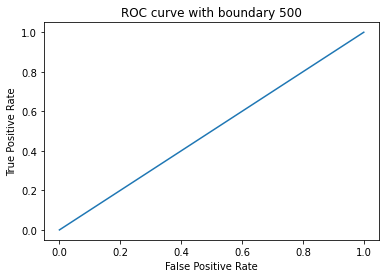

Thresholds: [2 1]


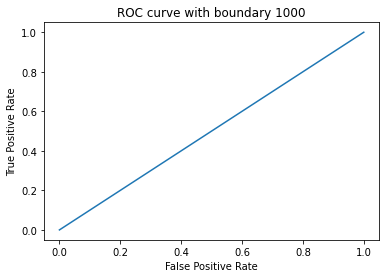

Thresholds: [2 1]


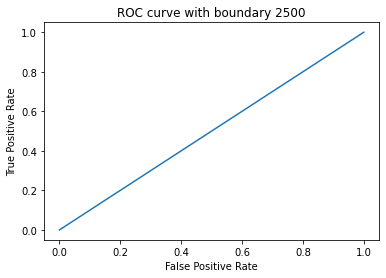

Thresholds: [2 1]


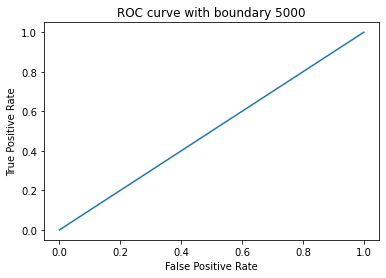

Thresholds: [2 1]
--------------- Starting model 4 on noise 1 ---------------


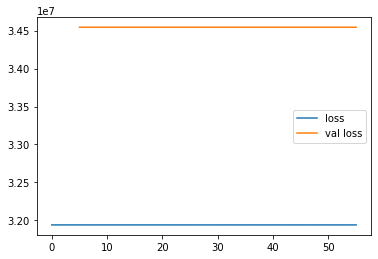

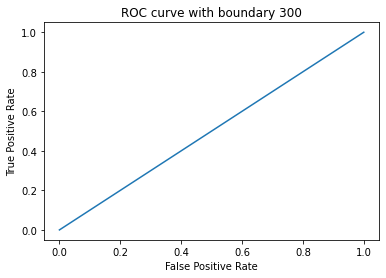

Thresholds: [2 1]


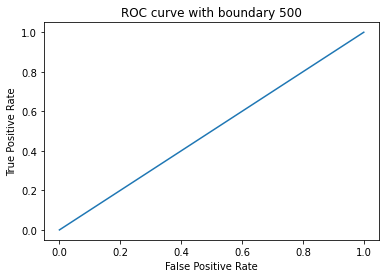

Thresholds: [2 1]


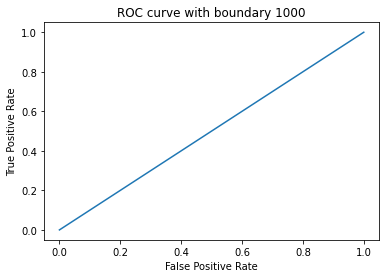

Thresholds: [2 1]


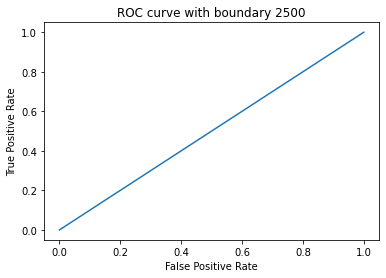

Thresholds: [2 1]


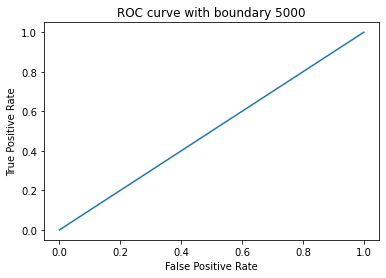

Thresholds: [2 1]
--------------- Starting model 4 on noise 2 ---------------


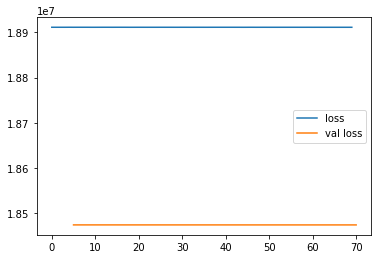

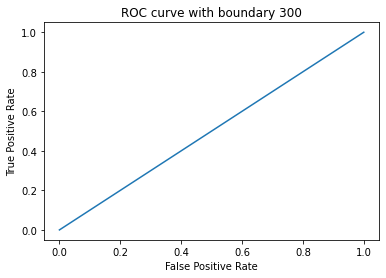

Thresholds: [2 1]


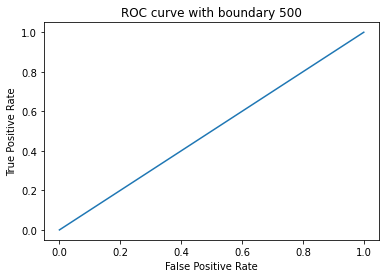

Thresholds: [2 1]


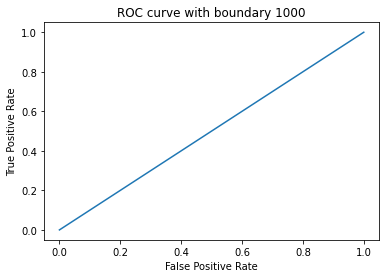

Thresholds: [2 1]


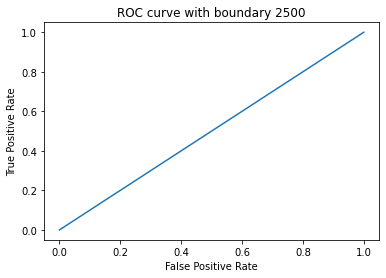

Thresholds: [2 1]


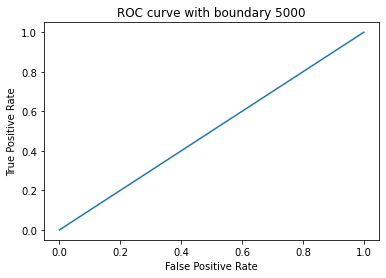

Thresholds: [2 1]
--------------- Starting model 4 on noise 3 ---------------


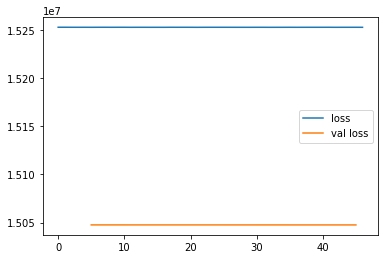

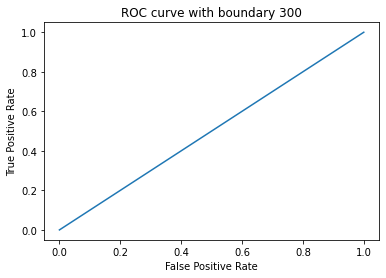

Thresholds: [2 1]


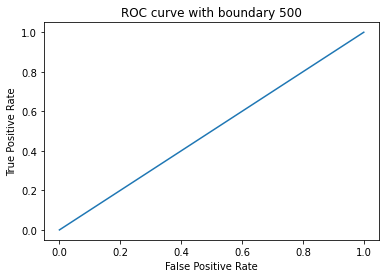

Thresholds: [2 1]


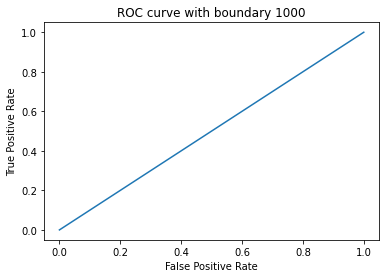

Thresholds: [2 1]


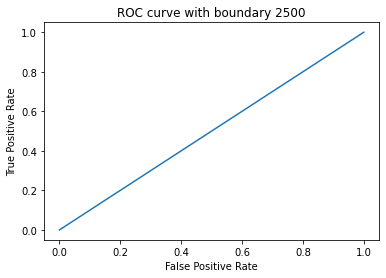

Thresholds: [2 1]


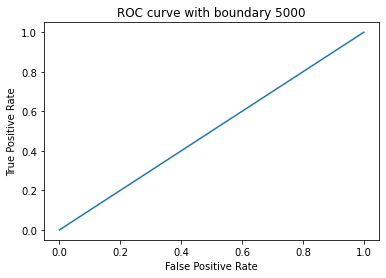

Thresholds: [2 1]
--------------- Starting model 4 on noise 5 ---------------


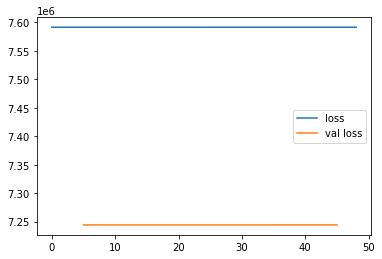

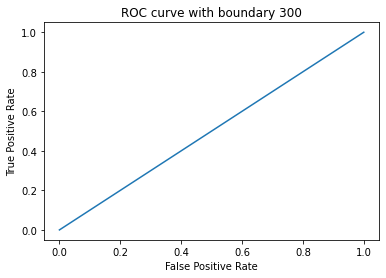

Thresholds: [2 1]


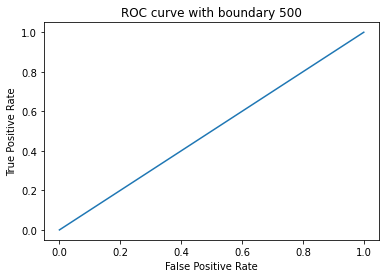

Thresholds: [2 1]


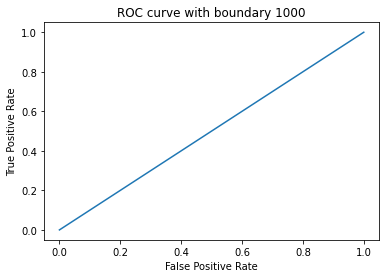

Thresholds: [2 1]


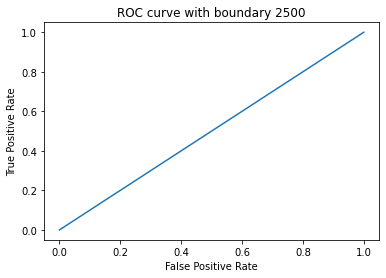

Thresholds: [2 1]


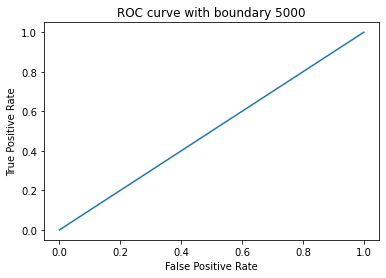

Thresholds: [2 1]
--------------- Starting model 4 on noise 8 ---------------


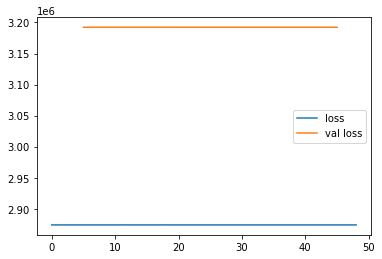

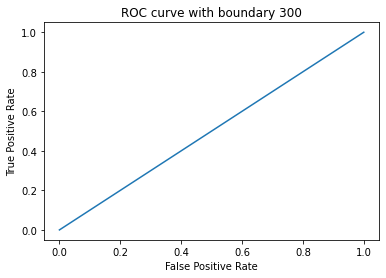

Thresholds: [2 1]


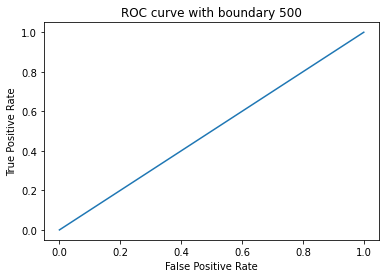

Thresholds: [2 1]


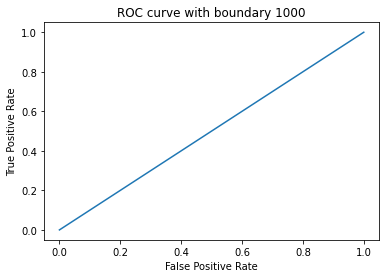

Thresholds: [2 1]


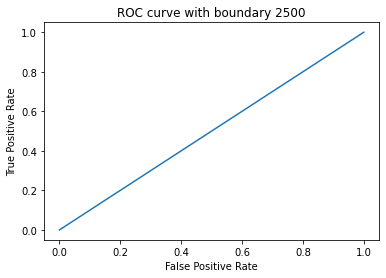

Thresholds: [2 1]


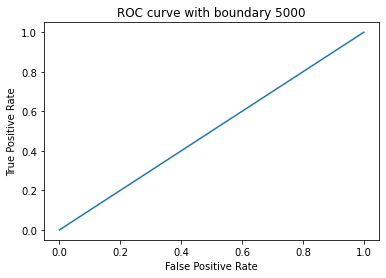

Thresholds: [2 1]


In [9]:
for i, lstm in enumerate(models_to_train):
    for n in [0, 1, 2, 3, 5, 8]:
        print(f'--------------- Starting model {i} on noise {n} ---------------')
        X_train, y_train, X_test, y_test = load_dataset(f'm{n}')

        model = train((X_train, y_train, X_test, y_test), lstm, epochs, 0, validation_freq, [scheduler, es])

        for boundary in [300, 500, 1000, 2500, 5000]:
            plot_roc(y_test, model.predict(X_test), boundary)

        model.save(f'model_saves/tests/lstm-{i}{n}-model.h5')